In [1]:
import pandas as pd
import sqlalchemy as sq
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
plt.style.use('fivethirtyeight')
%matplotlib inline

# Connect to database

In [2]:
engine = sq.create_engine('sqlite:///OKC_Processed_DB.db') #create connection to the database

# Get tables

In [3]:
df_num = pd.read_sql_table('numerical_attributes',engine)
df_rsp = pd.read_sql_table('question_responses',engine)
df_att = pd.read_sql_table('attributes_preferences',engine)
df_tst = pd.read_sql_table('test_responses',engine)
df_key0 = pd.read_sql_table('questions_key',engine)
df_key = df_key0[df_key0.loc[:,'N']>=31548]

# Helper Functions

This function takes a dataframe and a string, and returns a new dataframe with all columns with headers that begin with that string

In [4]:
def get_columns(df,key):
    headers_all = list(df.columns)
    headers = [name for name in headers_all if name[0:len(key)]==key]
    return df.loc[:,headers]
#Example
get_columns(df_num,'d_').tail()

,d_income,d_age
68366,None,48
68367,None,32
68368,None,24
68369,None,33
68370,None,49


This function takes a question key table + a question key, and return the question associated with the key

In [50]:
def get_question(df,key):
    return df.loc[df.iloc[:,0]==key,:]
#Example
get_question(df_key,'q14835')

,Unnamed: 0,text,option_1,option_2,option_3,option_4,N,Type,Order,Keywords


This function takes a keyword and searches for questions that contain such keyword in the question text

In [55]:
def search_questions(df,key):
    indexlist = []
    key = str.upper(key)
    df.fillna(value=0,inplace=True)
    for i in range(len(df_key.iloc[:,1])):
        if key in str.upper(str(df_key.iloc[i,1])):
            indexlist.append(i)
        elif key in str.upper(str(df_key.iloc[i,2])):
            indexlist.append(i)
        elif key in str.upper(str(df_key.iloc[i,3])):
            indexlist.append(i)
        elif key in str.upper(str(df_key.iloc[i,4])):
            indexlist.append(i)
        elif key in str.upper(str(df_key.iloc[i,5])):
            indexlist.append(i)
        elif key in str.upper(str(df_key.iloc[i,6])):
            indexlist.append(i)
        elif key in str.upper(str(df_key.iloc[i,7])):
            indexlist.append(i)
        elif key in str.upper(str(df_key.iloc[i,8])):
            indexlist.append(i)
        elif key in str.upper(str(df_key.iloc[i,9])):
            indexlist.append(i)
    return df_key.iloc[indexlist,:]
#Example
search_questions(df_key,'mari')

/Users/Bob/anaconda/lib/python3.5/site-packages/pandas/core/frame.py:2824: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


,Unnamed: 0,text,option_1,option_2,option_3,option_4,N,Type,Order,Keywords
20,q9688,Could you date someone who does drugs?,No,"Yes, but only soft stuff like marijuana",Yes,0,55697,O,0,preference
50,q79,What's your relationship with marijuana?,I smoke regularly.,I smoke occasionally.,"I smoked in the past, but no longer.",Never.,49796,O,0,descriptive
147,q59457,Are you okay with people who grow marijuana fo...,Yes.,No.,0,0,36553,O,0,politics
180,q62254,"If it were legal to do so where you live, woul...",Yes.,No.,0,0,34257,O,0,descriptive
211,q341,Regardless of whether or not you smoke marijua...,Yes,No,0,0,32473,O,0,politics


In [19]:
def get_columns_multi(df,keylist):
    headerlist = []
    for key in keylist:
        headers_all = list(df.columns)
        headers = [name for name in headers_all if name[0:len(key)]==key]
        headerlist = headerlist+headers
    return df.loc[:,headerlist]
#Example
get_columns_multi(df_rsp,['q35778','q1062','q45428','q85835','q48753','q35355','q41','q24345']).head()

,q35778_Maybe.,q35778_No.,q35778_Yes.,q1062_A couple times a week.,q1062_At least once a day.,q1062_Once a week or less.,q1062_Usually daily. I skip some.,q45428_Always.,q45428_Most of the time.,q45428_Never.,...,q411_No,q411_Unsure,q411_Yes,q41393_I'm neutral / it depends on their other traits.,q41393_Turn-off. I find easily-confused types annoying.,q41393_Turn-on. I find scatterbrained people cute.,q24345_A bit.,q24345_A lot!,q24345_Intelligence does nothing for me either way.,q24345_Intelligence turns me off.
0,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Modelling

Make a giant-ass matrix with y as column1 and features as rest of the columns

In [23]:
df_all = pd.concat([pd.to_numeric(df_num.CA),df_rsp,df_att],axis=1)
df_all = df_all[pd.notnull(df_all['CA'])]
df_all.fillna(value=0,inplace=True)

(array([    34.,    316.,   2537.,   4076.,   8135.,   9871.,  12340.,
         10481.,   7253.,   1555.]),
 array([-3.58702023, -3.0038059 , -2.42059157, -1.83737724, -1.25416291,
        -0.67094858, -0.08773425,  0.49548008,  1.07869441,  1.66190874,
         2.24512307]),
 <a list of 10 Patch objects>)

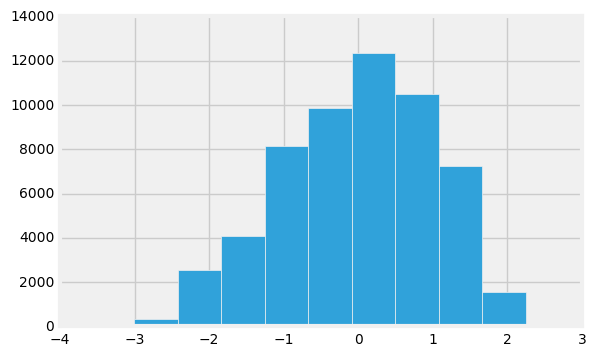

In [26]:
plt.hist(df_all.CA)

In [31]:
bins = [-10, -1.5, -0.5, 0.5, 1.5, 10]
groups = ['supa dum', 'dum', 'meh', 'smaht', 'supa smaht']
y = pd.cut(df_all['CA'], bins, labels=groups)
X = df_all.iloc[:,1:]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
model = LogisticRegression()
fit = model.fit(X_train,y_train)

In [34]:
from sklearn.metrics import accuracy_score
y_pred = fit.predict(X_test)
accuracy_score(y_pred,y_test)

0.46819787985865724

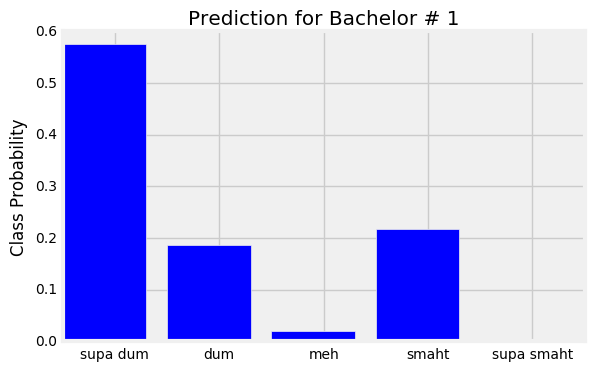

In [64]:
#Example Prediction
Bachelor1 = X_test.iloc[10,:].values.reshape(1,-1)
y_pred = fit.predict_proba(Bachelor1)
plt.bar(range(0,5),list(y_pred[0]))
plt.xticks([0.5,1.5,2.5,3.5,4.5],groups)
plt.title('Prediction for Bachelor # 1')
plt.ylabel('Class Probability');

In [48]:
list(y_pred[0])

[0.57597023527122149,
 0.18583933791681431,
 0.020081803042323213,
 0.21786729939139726,
 0.0002413243782436927]

# Weed Model (with all features)

Build label set by first finding the responses to the question of interest:

In [226]:
y_dummied = get_columns(df_rsp,'q80_')
y_dummied.head()

,q80_I do drugs occasionally.,q80_I do drugs regularly.,q80_I never do drugs.,"q80_I've done drugs in the past, but no longer."
0,0,0,1,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [227]:
np.sum(y_dummied,0)

q80_I do drugs occasionally.                        4169
q80_I do drugs regularly.                            192
q80_I never do drugs.                              35650
q80_I've done drugs in the past, but no longer.    10096
dtype: int64

In [228]:
y_dummied.columns =  ['occasional','regular','never','past'];y_dummied.head()

,occasional,regular,never,past
0,0,0,1,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


Make the label set (y)

In [229]:
import warnings
warnings.filterwarnings('ignore')#hide warnings

y = y_dummied.iloc[:,[0]]

In [274]:
y.columns = ['class']
y[y_dummied.occasional==1] = 'Occasionally'
y[y_dummied.regular==1] = 'Occasionally'
y[y_dummied.past==1] = 'Never'
y[y_dummied.never==1] = 'Occasionally'
y[y==0] = np.nan #remove non-respondents after other classes have been assigned

Drop the question from the X matrix (since it's in y)

In [275]:
X = pd.concat([df_rsp],axis=1)
headers_all = list(X.columns)
headers = [name for name in headers_all if name[0:len('q80_')]!='q80_' 
                                       and name[0:len('q9688_')]!='q9688_'
                                       and name[0:len('q62254_')]!='q62254_'
                                       and name[0:len('q59457_')]!='q59457_'
                                       and name[0:len('q25228_')]!='q25228_']
X = X.loc[:,headers]
df_all = pd.concat([y,X],axis=1)
df_all = df_all.dropna(subset=['class'])
df_all.fillna(value=0,inplace=True)

In [276]:
y = df_all.iloc[:,0]
X = df_all.iloc[:,1:]

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X,y)
model = LogisticRegression()
fit = model.fit(X_train,y_train)
y_pred = fit.predict(X_test)
accuracy_score(y_pred,y_test)

0.80721641254889442

In [278]:
features = []
for i in range(len(list(fit.coef_[0]))):
    features.append((np.abs(fit.coef_[0][i]),X.columns[i]))

In [279]:
sorted(features,reverse=True)

[(1.8110809224501494, 'q79_Never.'),
 (0.87923302518363744, 'q79_I smoked in the past, but no longer.'),
 (0.59760086494950171, 'q77_Never'),
 (0.55102132431017992, 'q79_I smoke occasionally.'),
 (0.54580050709318617, 'q1062_Once a week or less.'),
 (0.47107359490680134, 'q66506_Not important.'),
 (0.46677737041492839, 'q43261_I always do what my parents say.'),
 (0.43913034234960968, 'q1052_Very often'),
 (0.40427338386384776, 'q21411_I'm not smart enough.'),
 (0.39807265712979173, 'q45428_Occasionally.'),
 (0.39421360607050343, 'q41953_One night'),
 (0.38216882182896988, 'q79_I smoke regularly.'),
 (0.37432022128875048,
  'q31877_Sexist and insulting, women are perfectly capable.'),
 (0.36448516974047568, 'q274_Junior High'),
 (0.36358358110054839, 'q24345_Intelligence turns me off.'),
 (0.36054659484088214, 'q21175_I find learning boring'),
 (0.35751130015311416, 'q23543_No, I'd prefer not to communicate daily'),
 (0.35740861985768096, 'q81_Lots'),
 (0.3522479253793237, 'q1062_A cou

In [291]:
get_question(df_key,'q31877')

,Unnamed: 0,text,option_1,option_2,option_3,option_4,N,Type,Order,Keywords
138,q31877,When men show extra courtesy toward women (ope...,Admirable and desirable. Chivalry's not dead.,Unnecessary but appreciated.,"Sexist and insulting, women are perfectly capa...",0,37183,O,0,politics; opinion


In [249]:
get_question(df_key,'q1062')

,Unnamed: 0,text,option_1,option_2,option_3,option_4,N,Type,Order,Keywords
91,q1062,How frequently do you bathe or shower?,At least once a day.,Usually daily. I skip some.,A couple times a week.,Once a week or less.,41649,O,0,descriptive


In [155]:
get_question(df_key,'q45428')

,Unnamed: 0,text,option_1,option_2,option_3,option_4,N,Type,Order,Keywords
144,q45428,Do you say 'Thank you' to wait staff when serv...,Always.,Most of the time.,Occasionally.,Never.,36781,O,0,descriptive


In [157]:
get_question(df_key,'q43639')

,Unnamed: 0,text,option_1,option_2,option_3,option_4,N,Type,Order,Keywords


In [28]:
pd.options.display.max_rows = 200
#df_key.head(200)

In [43]:
dfrsp = get_columns_multi(df_rsp,['q35778_','q1062_','q45428_','q85835_','q48753_','q35355_','q41_','q24345_']);dfrsp.tail()

,q35778_Maybe.,q35778_No.,q35778_Yes.,q1062_A couple times a week.,q1062_At least once a day.,q1062_Once a week or less.,q1062_Usually daily. I skip some.,q45428_Always.,q45428_Most of the time.,q45428_Never.,...,q35355_Not at all.,q35355_Very open. I'll try anything once.,q41_Extremely important,q41_Not at all important,q41_Not very important,q41_Somewhat important,q24345_A bit.,q24345_A lot!,q24345_Intelligence does nothing for me either way.,q24345_Intelligence turns me off.
68366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
dfatt = get_columns_multi(df_rsp,['q30_']).fillna(value=0);dfatt.tail()

,q30_No,"q30_Yes, lots and lots","q30_Yes, some"
68366,0,0,0
68367,0,0,0
68368,0,0,0
68369,0,0,0
68370,0,0,0
